In [2]:
import re

import matplotlib.pyplot as plt
from konlpy.tag import Hannanum
from apyori import apriori
#apyori(transaction data,[ 최소 지지도], [최소 신뢰도], [최소향상도],[최소규격크기]
hannanum = Hannanum()

with open('우크라이나.csv','r',encoding="cp949") as f:
    lines = f.readlines()

dataset = []
for i in range(len(lines)):
    dataset.append(hannanum.nouns(re.sub('[^a-zA-Z가-힣\s]','',lines[i])))

dataset[:3]

result=list(apriori(dataset,min_support=0.01))


In [3]:
import pandas as pd
df = pd.DataFrame(result)
df['length']=df['items'].apply(lambda x: len(x))
df = df[(df['length'] ==2) & df['support'] >= 0.01].sort_values(by='support', ascending=False)

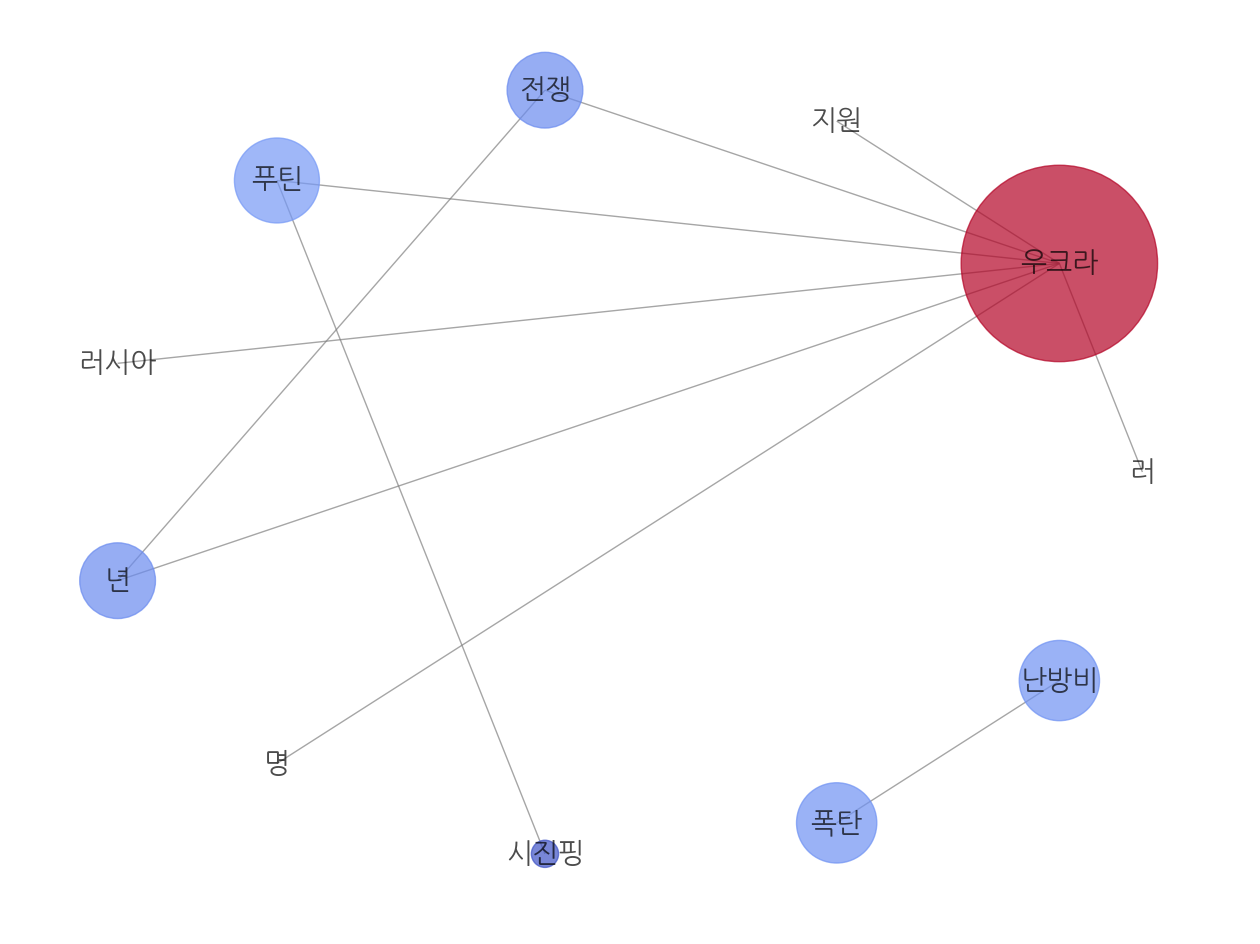

In [4]:
import networkx as nx
import numpy as np

graph = nx.Graph()
ar = df['items']
graph.add_edges_from(ar)
pager_rank = nx.pagerank(graph) 
nsize = np.array([v for v in pager_rank.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))
pos = nx.circular_layout(graph) 
plt.figure(figsize=(16,12))
plt.axis('off')
nx.draw_networkx(graph, font_family="NanumGothic", font_size=20, pos=pos, node_color=list(pager_rank.values()),node_size=nsize*10, alpha=0.7, edge_color='0.5', cmap=plt.cm.coolwarm)
plt.savefig('img.png', bbox_inches='tight')

